<a href="https://colab.research.google.com/github/Lzino/Finance_Repo/blob/main/Stock_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas --quiet

In [2]:
# 1. yfinance, pandas 설치 생략
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

ticker = 'NVDA'
data = yf.download(ticker, period="6y", interval="1mo")

# 멀티인덱스 컬럼 -> 단일 컬럼으로 변환
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

df = data.reset_index()

df['Month'] = df['Date'].dt.strftime('%Y-%m')
df['AvgPrice'] = (df['Open'] + df['Close']) / 2
df['TradingValue'] = df['AvgPrice'] * df['Volume']

# 전월대비 수익률(가격)과 전월대비 거래대금 증가율 계산
df['Return_%'] = df['AvgPrice'].pct_change() * 100
df['TradingValue_Change_%'] = df['TradingValue'].pct_change() * 100

# 포맷팅
df['TradingValue'] = df['TradingValue'].apply(lambda x: f"{x:,.0f}")
df['AvgPrice'] = df['AvgPrice'].round(2)
df['Return_%'] = df['Return_%'].round(2)
df['TradingValue_Change_%'] = df['TradingValue_Change_%'].round(2)

df = df[['Month', 'Volume', 'AvgPrice', 'TradingValue', 'Return_%', 'TradingValue_Change_%']]


/tmp/ipython-input-2-1492615944.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6y", interval="1mo")
[*********************100%***********************]  1 of 1 completed


In [3]:
# 보기 쉽게 정렬
#df_sorted = df.sort_values(by='Month', ascending=False).reset_index(drop=True)
#df_sorted

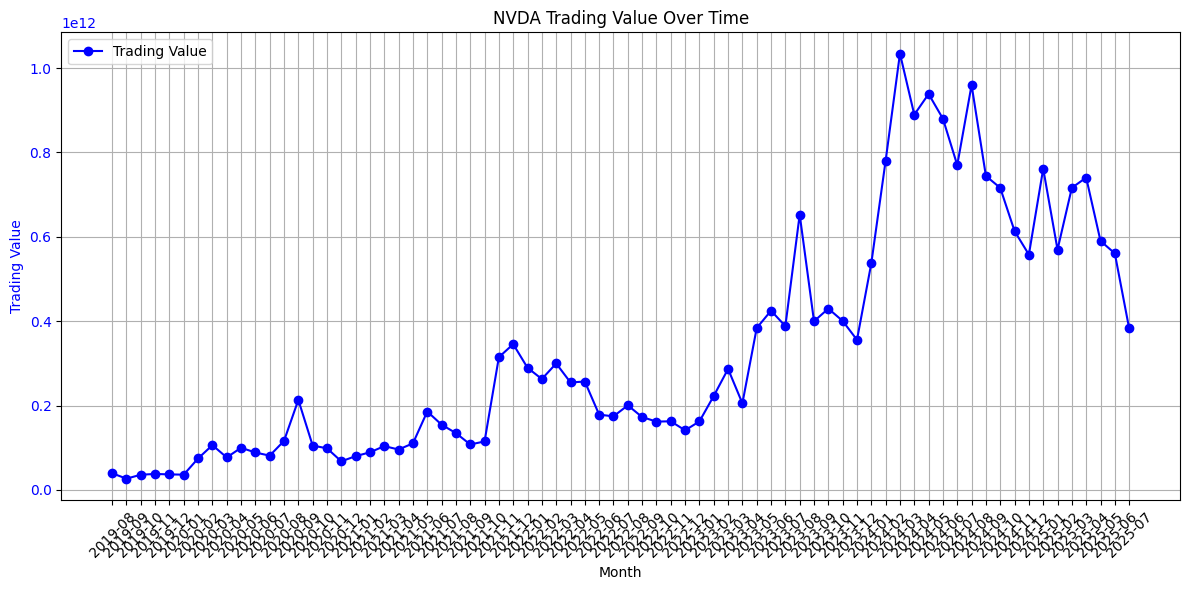

In [4]:
# prompt: TradingValue 그래프 만들어줘

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot TradingValue on the left y-axis
ax1.plot(df['Month'], df['TradingValue'].str.replace(',', '').astype(float), color='blue', marker='o', label='Trading Value')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trading Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
ax1.legend(loc='upper left')

plt.title(f'{ticker} Trading Value Over Time')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

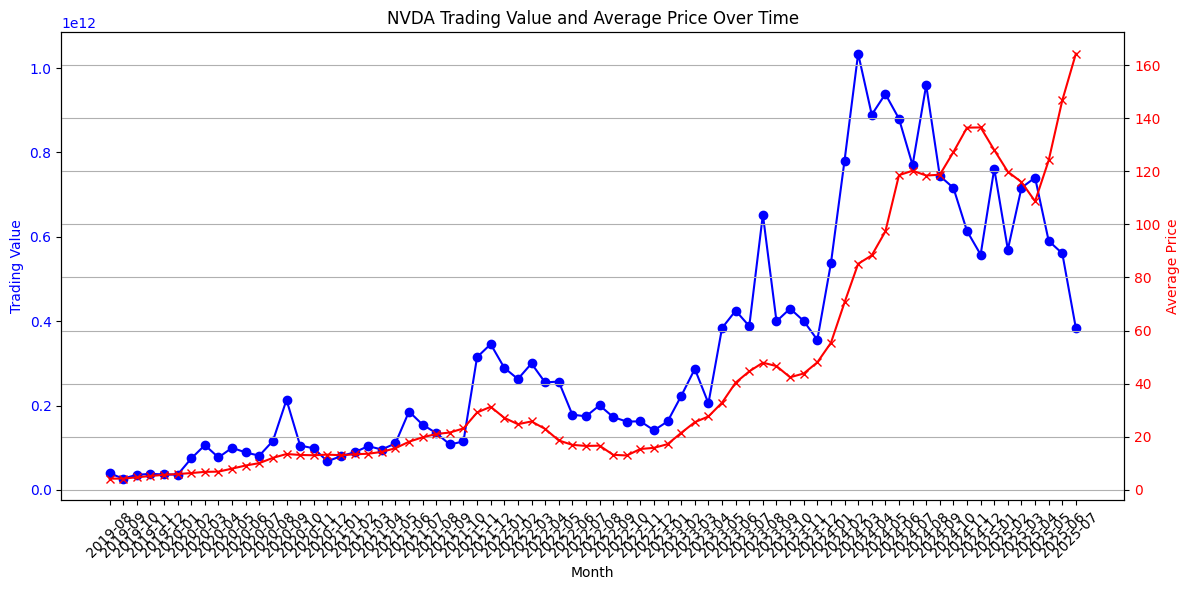

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# TradingValue (left y-axis)
ax1.plot(df['Month'], df['TradingValue'].str.replace(',', '').astype(float), color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trading Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# AvgPrice (right y-axis)
ax2 = ax1.twinx()
ax2.plot(df['Month'], df['AvgPrice'], color='red', marker='x')
ax2.set_ylabel('Average Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'{ticker} Trading Value and Average Price Over Time')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

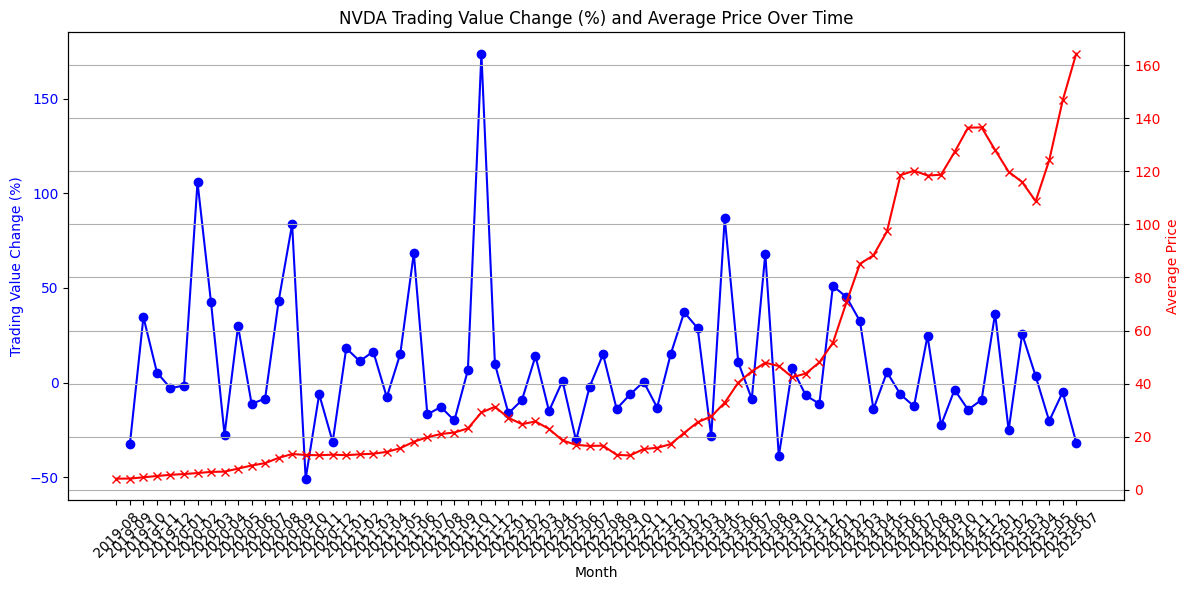

In [6]:
# prompt: TradingValue_Change_%와 AvgPrice를 그래프로 만들어줘

fig, ax1 = plt.subplots(figsize=(12, 6))

# TradingValue_Change_% (left y-axis)
ax1.plot(df['Month'], df['TradingValue_Change_%'], color='blue', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Trading Value Change (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# AvgPrice (right y-axis)
ax2 = ax1.twinx()
ax2.plot(df['Month'], df['AvgPrice'], color='red', marker='x')
ax2.set_ylabel('Average Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'{ticker} Trading Value Change (%) and Average Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Download the file
df.to_csv('stock_data.csv', index=False)
files.download('stock_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>